In [1]:
!pip install -q keras
#!pip install -U tensorflow
#!pip install -U tensorflow-gpu==1.15
# Ensure that the latest TensorFlow version is installed.
#!pip install -q tf-nightly-gpu-2.0-preview
# Load the TensorBoard notebook extension.
%load_ext tensorboard
%tensorflow_version 2.x      
!pip install -U tensorflow-gpu    
!pip show tensorflow

TensorFlow 2.x selected.
     |████████████████████████████████| 380.8MB 43kB/s 
Name: tensorflow
Version: 2.0.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /tensorflow-2.0.0/python3.6
Requires: google-pasta, absl-py, six, opt-einsum, termcolor, numpy, wrapt, astor, keras-applications, protobuf, grpcio, tensorboard, gast, tensorflow-estimator, wheel, keras-preprocessing
Required-by: stable-baselines, magenta, fancyimpute


In [0]:
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/My\ Drive/TFG/NN/Multispectral

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
import keras

Using TensorFlow backend.


damaged
img_array:  (128, 128) uint8


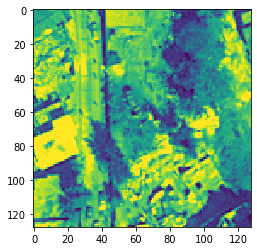

undamaged
img_array:  (128, 128) uint8


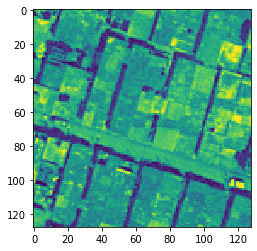

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
categories=["damaged", "undamaged"]
for category in categories:
  path=os.path.join('.',category)
  for img in os.listdir(path):
    print(category)
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    print('img_array: ',img_array.shape,img_array.dtype)
    plt.imshow(img_array)
    plt.show()
    break

In [0]:
training_data=[]
def create_training_data():
  for category in categories:
    path=os.path.join('.',category)
    class_num=categories.index(category) # index as 0 and 1 to damaged and undamaged
    for img in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array= cv2.resize(img_array,(128,128))
      training_data.append([img_array,class_num])   
create_training_data()

In [0]:
print(len(training_data))
import random
#random.shuffle(training_data)

268


In [0]:
for sample in training_data:
  print(sample[1])
  
print(len(sample))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2


In [0]:
from sklearn.model_selection import train_test_split
x=[]
y=[]
for features, label in training_data:
  x.append(features)
  y.append(label)
x = np.array(x).reshape(-1,128,128,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle= True)
print('x_train:'+str(x_train.shape))
print('y_train:'+str(len(y_train)))
print('x_test:'+str(x_test.shape))
print('y_test:'+str(len(y_test)))

x_train:(214, 128, 128, 1)
y_train:214
x_test:(54, 128, 128, 1)
y_test:54


In [0]:
#Data Argumentation
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=15,
                               horizontal_flip=True,
                               vertical_flip=True,
                               data_format='channels_last')
def create_aug_gen(in_gen):
  for in_x,in_y in in_gen:
    g_x = image_gen.flow(255*in_x,in_y,batch_size=in_x.shape[0])
    x,y=next(g_x)
    yield x/255.0,y

Using TensorFlow backend.


In [0]:
#Data Argumentation
import random
train_data = []
x_train_arg = []
y_train_arg = []
train_data.append([x_train,y_train])
cur_gen = create_aug_gen(iter(train_data))
t_x,t_y = next(cur_gen)
print('t_x',t_x.shape, t_x.dtype)
print('t_y',t_y.shape, t_y.dtype)
#for x in t_x:
#  plt.imshow(x.reshape(128,128))
#  plt.show()
x_train_arg = np.concatenate((x_train,t_x), axis=0)
y_train_arg = np.concatenate((y_train,t_y), axis=None)
print('x_train', x_train_arg.shape, x_train_arg.dtype)
print('y_train', y_train_arg.shape, y_train_arg.dtype)
#Shuffle data
random.shuffle([x_train_arg,y_train_arg])

In [0]:
#Images generated by the data argumentation
i = 0
for x in t_x:
  print(categories[t_y[i]])
  plt.imshow(x.reshape(128,128))
  plt.show()
  i = i+1

In [0]:
import pickle
pickle_out=open("x.pickle","wb")
#pickle.dump(x,pickle_out)
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
#pickle.dump(y,pickle_out)
pickle.dump(y_train,pickle_out)
pickle_out.close()

In [0]:
# x[1] is feature and y[1] is label

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,SpatialDropout2D, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils as np_utils
import pickle
from keras.preprocessing.image import load_img
import time
import datetime

#x=pickle.load(open("x.pickle","rb"))
#y=pickle.load(open("y.pickle","rb"))
#x_training=x_training/255.0

x = np.array(x_train).astype(np.float64)/255.0


y = np.array(y_train).astype(np.float64)
y_testing = np.array(y_test).astype(np.float64)


print('x_train:',x.shape,x.dtype)
print('y_train:',y.shape,y.dtype)
print('x_test:',x_test.shape,x.dtype)
#print('y_test:',y_test.shape,y.dtype)

def create_model(x):
  tf.keras.backend.clear_session()

  inputs = Input(x.shape[1:])

  #Layer 1
  layer = Conv2D(64,(3,3),activation='relu')(inputs)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 2
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 3
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 4
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  #layer = Activation('relu')(layer)

  layer = Flatten()(layer)
  #layer = Dense(64)(layer)
  layer = Activation('relu')(layer)

  output = Dense(1,activation='sigmoid')(layer)
  return Model(inputs=inputs,outputs=output)


#strategy = tf.distribute.MirroredStrategy()
#with strategy.scope():
model = create_model(x)
op = Adam()
model.compile(loss="binary_crossentropy",optimizer= op, metrics=['accuracy'])


#Model Summary
model.summary()

end = time.time()
time_saver = datetime.datetime.now().strftime("%d%m%Y-%H%M%S")
print(time_saver)        

x_train: (214, 128, 128, 1) float64
y_train: (214,) float64
x_test: (54, 128, 128, 1) float64
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________

In [0]:
#TensorBoard  
name_file= "128CNN_"+time_saver
filepath = 'models/model/Best_128CNN-'+time_saver+'.h5'
tensorboard = TensorBoard(log_dir='logs/{}'.format(name_file), write_graph=True, write_images=True,
                          histogram_freq=1,profile_batch=3)
#Model Checkpoint (callbacks)
checkpoint = ModelCheckpoint(filepath,verbose=1,monitor='accuracy',save_best_only = True, mode='max')
callbacks_list = [tensorboard,checkpoint]

start = time.time()

history=model.fit(x=x,y=y, batch_size=32,epochs=200,validation_split=0.2,shuffle=True,callbacks=callbacks_list) 

end = time.time()

Train on 171 samples, validate on 43 samples
Epoch 1/200
 96/171 [===============>..............] - ETA: 3s - loss: 0.6812 - accuracy: 0.6042
Epoch 00001: accuracy improved from -inf to 0.55556, saving model to models/model/Best_128CNN-18112019-160319.h5
171/171 [==============================] - 5s 32ms/sample - loss: 0.7190 - accuracy: 0.5556 - val_loss: 0.6939 - val_accuracy: 0.5349
Epoch 2/200
160/171 [===========================>..] - ETA: 0s - loss: 0.7317 - accuracy: 0.4437
Epoch 00002: accuracy did not improve from 0.55556
171/171 [==============================] - 0s 775us/sample - loss: 0.7335 - accuracy: 0.4386 - val_loss: 0.6929 - val_accuracy: 0.4651
Epoch 3/200
 32/171 [====>.........................] - ETA: 0s - loss: 0.7412 - accuracy: 0.4688
Epoch 00003: accuracy did not improve from 0.55556
171/171 [==============================] - 0s 677us/sample - loss: 0.7150 - accuracy: 0.4737 - val_loss: 0.6930 - val_accuracy: 0.5349
Epoch 4/200
160/171 [========================

Time Training: 1787.4132809638977
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Acc Max: 0.99415207
Loss Min: 0.03780745612511858


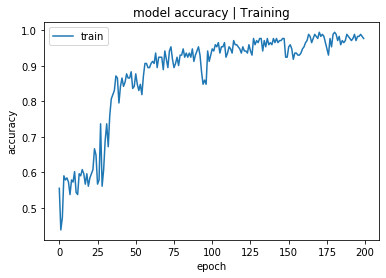

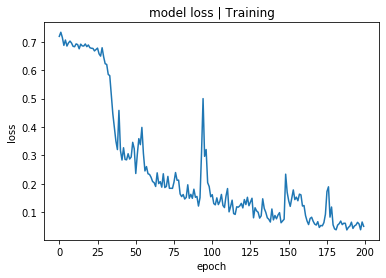

In [0]:
print("Time Training: "+str(end-start))
# list all data in history to plot accuracy
print(history.history.keys())
print('Acc Max:',max(history.history['accuracy']))
print('Loss Min:',min(history.history['loss']))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy | Training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss | Training')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import pickle
pickle_out=open("x_test.pickle","wb")
#pickle.dump(x,pickle_out)
pickle.dump(x_test,pickle_out)
pickle_out.close()

pickle_out=open("y_test.pickle","wb")
#pickle.dump(y,pickle_out)
pickle.dump(y_test,pickle_out)
pickle_out.close()

x_test =pickle.load(open("x_test.pickle","rb"))
y_test =pickle.load(open("y_test.pickle","rb"))
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_test: (54, 128, 128, 1)
y_test: (54,)


In [0]:
y_test = np.array(y_test).astype(np.float64)
history_eval = model.evaluate(x=x_test,y=y_test,batch_size=32,callbacks=callbacks_list)
print(history_eval)

81/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
#model.save('models/model/128CNN-'+time_saver+'.h5')
model.save_weights('models/weights/128CNN-'+time_saver+'.h5')

In [0]:
print(time_saver)
!ls

28102019-112540
drive  sample_data


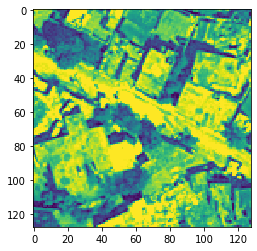

damaged
[[7.805244e-06]]


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
categories=["damaged","undamaged"] #Testing code
def prepare(filename):
  img_array=cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  plt.imshow(img_array)
  plt.show()
  new_array=cv2.resize(img_array,(128,128))
  return new_array.reshape(-1,128,128,1)/255.0
model_save=tf.keras.models.load_model('models/model/128CNN-21102019-160139.h5')
model_save.load_weights('models/weights/128CNN-21102019-160139.h5')

img = 'damaged/post_049_107.png'
prepare_img = prepare(img).astype(np.float32)
prediction=model_save.predict([prepare_img])
predict = 1 if prediction[0][0] >= 0.5 else 0
print (categories[predict])
#print (categories[int(prediction[0])])
print(prediction)
#print(end-start)

In [0]:
#Testing the algorithm with all the data avariable
import os
y_predicted = []
y_true = []
def get_predictions():
  for features, label in training_data:
    #print(features)
    prediction=model_save.predict([np.array(features.reshape(-1,128,128,1)).astype(np.float64)/255.0])
    predict = 1 if prediction[0][0] >=0.5 else 0
    y_predicted.append(predict)
    y_true.append(label)


get_predictions()
y_predicted = np.array(y_predicted).astype(np.int)
y_true = np.array(y_true,np.uint8)

In [0]:
import collections
print('y_predicted:',y_predicted.shape,y_predicted)
print('y_true:',y_true.shape,y_true)
print('Testing the whole dataset:',collections.Counter(y_predicted == y_true))

y_predicted: (268,) [0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1
 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 1 0 0 1 0 1 1 1]
y_true: (268,) [0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1
 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 

In [0]:
#Trying with the test data
import collections
y_test_prediction_comp = []
y_test_prediction = []
x_testing = np.array(x_test).astype(np.float64)/255.0
#print('x_test',x_testing.shape,x_testing.dtype,x_testing)
for x in x_testing:
  x= np.array([x])
  #print('x',x.shape,x)
  test_prediction = model_save.predict(x)
  #test_prediction = model.predict(x) #Model already save
  x_image = x.reshape(128,128)
  plt.imshow(x_image)
  plt.show()
  predict_test = 1 if test_prediction[0][0] >= 0.5 else 0
  y_test_prediction.append(test_prediction[0][0])
  y_test_prediction_comp.append(predict_test)
print('y_test_prediction:',y_test_prediction)
print('y_test_true',y_test)
print('Test data:',collections.Counter(y_test_prediction_comp==np.array(y_test)))

Output hidden; open in https://colab.research.google.com to view.

**<h1>3. FREEZING THE MODEL</h1>**

<h2>3.1. Save the model as TF´s model</h2>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model=tf.keras.models.load_model('models/model/Best_128CNN-31102019-104724.h5')
model.load_weights('models/weights/128CNN-31102019-104724.h5')
model.save('models/tf/',save_format='tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: drive/My Drive/TFG/NN/Multispectral/models/tf/assets


<h2>3.2. Freeze Model and Export it</h2>

**(Option 1) Using a TensorFlow Estimator**

In [0]:
from tensorflow.compat.v1.estimator.inputs import numpy_input_fn
estimator_model = tf.keras.estimator.model_to_estimator(keras_model=model,model_dir="/models/freeze")
def input_function(feature,labels,shuffle=False):
  input_fn = numpy_input_fn(
      x = {'input node': features},
      y = labels,
      shuffle=shuffle,
      batch_size = 32,
      num_epochs = 200
  )
  return input_fn
estimator_model.train(input_fn=input_function(x,y,True))

**(Option 2) Try to freeze the model**

In [0]:
import tensorflow.compat.v1 as tf
def frozen_graph_maker(export_dir,output_graph):
  with tf.Session(graph=tf.Graph()) as sess:
    tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.SERVING], export_dir)
    output_nodes = [n.name for n in tf.get_default_graph().as_graph_def().node]
    output_graph_def = tf.graph_util.convert_variables_to_constants(
            sess, # The session is used to retrieve the weights
            sess.graph_def,
            output_nodes# The output node names are used to select the usefull nodes
    )
    output_graph_def = tf.graph_util.remove_training_nodes(output_graph_def)       
    # Finally we serialize and dump the output graph to the filesystem
    with tf.gfile.GFile(output_graph, "wb") as f:
              f.write(output_graph_def.SerializeToString())

export_dir='models/tf'
output_graph = "models/freeze/frozen_graph.pb"
frozen_graph_maker(export_dir,output_graph)

INFO:tensorflow:Restoring parameters from drive/My Drive/TFG/NN/Multispectral/models/tf/variables/variables
INFO:tensorflow:Froze 43 variables.
INFO:tensorflow:Converted 43 variables to const ops.


In [0]:
def freeze_session(session,keep_var_names=None,output_names=None,clear_devices=True):
  from tensorflow.compat.v1.graph_util import convert_variables_to_constants,remove_training_nodes
  graph = session.graph
  with graph.as_default():
    freeze_var_names = list(set(v.op.name for v in tfcompact.global_variables()).difference(keep_var_names or []))
    output_names = output_names or []
    output_names += [v.name for v in tfcompact.global_variables()]
    input_graph_def = graph.as_graph_def()
    if clear_devices:
      for node in input_graph_def.node:
        node_device = ""
    frozen_graph = convert_variables_to_constants(session,input_graph_def,output_names,freeze_var_names)
    frozen_graph = remove_training_nodes(frozen_graph)
    return frozen_graph

In [0]:
import tensorflow.compat.v1 as tfcompact
from tensorflow import keras as keras
import tensorflow as tf
from tensorflow.python.tools import freeze_graph
tf.keras.backend.clear_session()


model=tf.keras.models.load_model('models/model/Best_128CNN-07112019-153540.h5')
model.load_weights('models/weights/128CNN-07112019-153540.h5')

frozen_graph = freeze_session(tfcompact.Session(),
                              output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph,"models/frozen",'Frozen_07112019-153540.pb',as_text=False)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


AssertionError: ignored

In [0]:
from tensorflow.python.tools import freeze_graph
frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in restored_model.outputs], 
                             clear_devices=True)

tf.train.write_graph(frozen_graph, "/tmp", model_name+".pb", as_text=False)

**(Option 3) Rebuild the model, load the weights saved from another model and then, execute frozen_graph_2.py to get the model frozen**

In [0]:
!pip show tensorflow

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: gast, numpy, six, wrapt, tensorflow-estimator, absl-py, google-pasta, opt-einsum, protobuf, astor, termcolor, tensorboard, wheel, keras-applications, keras-preprocessing, grpcio
Required-by: stable-baselines, magenta, fancyimpute


In [0]:
def rebuild_model():
  tf.keras.backend.clear_session()

  inputs = Input((128,128,1))

  #Layer 1
  layer = Conv2D(64,(3,3),activation='relu')(inputs)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 2
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 3
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 4
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  #layer = Activation('relu')(layer)

  layer = Flatten()(layer)
  layer = Dense(64)(layer)
  #layer = Activation('relu')(layer)

  output = Dense(1,activation='sigmoid')(layer)
  return Model(inputs=inputs,outputs=output)

In [0]:
file_model = "21102019-160139"
rebuild_model = rebuild_model()
rebuild_model.load_weights('models/weights/128CNN-'+file_model+'.h5')
#rebuild_model.save('models/tf/',save_format='tf')
#tf.saved_model.save(rebuild_model,'models/tf/')
rebuild_model.save(file_model+'.h5')
!python 'models/freeze/freeze_graph_2.py' --h5 $file_model'.h5' --pb 'models/freeze/'$file_model'.pb'
!rm $file_model'.h5'

2019-11-22 11:09:45.652999: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-11-22 11:09:45.656445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1006] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-11-22 11:09:45.657179: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2019-11-22 11:09:45.657283: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2019-11-22 11:09:45.657356: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcublas.so.10.0'; dlerror: libcublas.so.10

<h4>Watch the output of the graph</h4>

In [0]:
out_names = [x for x in rebuild_model.outputs]
print(out_names)

[<tf.Tensor 'dense_1/Identity:0' shape=(None, 1) dtype=float32>]


**<h1>4. What-If Tool</h1>**

In [0]:
!pip install witwidget-gpu

     |████████████████████████████████| 2.2MB 6.8MB/s 


In [0]:
training_data=[]
def create_training_data():
  for category in categories:
    path=os.path.join('.',category)
    class_num=categories.index(category) # index as 0 and 1 to damaged and undamaged
    for img in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array= cv2.resize(img_array,(128,128))
      training_data.append([img_array,class_num])   
create_training_data()

In [0]:
x=[]
y=[]
for features, label in training_data:
  x.append(features)
  y.append(label)
x = np.array(x).reshape(-1,128,128,1)

In [0]:
from witwidget.notebook.visualization import WitConfigBuilder
from witwidget.notebook.visualization import WitWidget
from tensorflow.compat.v2.keras.estimator import model_to_estimator
model=tf.keras.models.load_model('models/model/128CNN-21102019-160139.h5')
model.load_weights('models/weights/128CNN-21102019-160139.h5')
model_estimator = model_to_estimator(keras_model=model,model_dir='estimator/')
#y_wit = np.array(y_test).reshape(len(y_test),-1).astype(np.uint8)
wit_data = tf.data.Dataset.from_tensor_slices((x,y))
#print('y_wit',y_wit,y_wit.shape,y_wit.dtype)
#print(wit_data)
config_builder = WitConfigBuilder(wit_data).set_estimator_and_feature_spec(model_estimator,categories)
WitWidget(config_builder)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using config: {'_model_dir': 'estimator/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd129a50e10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


TypeError: ignored